<a href="https://colab.research.google.com/github/abdelkadermiladi/WebScraping/blob/main/WeatherScraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Weather scraping for the next seven days and converting the extracted data to csv file.**

Here is a screenshot of the weather from the web page :
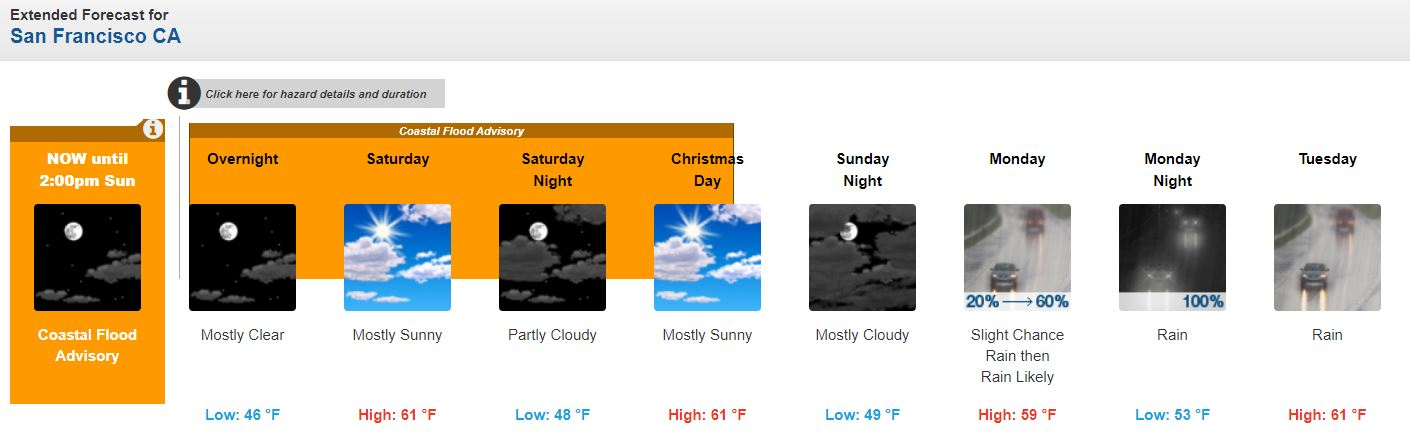

And here is the csv file:
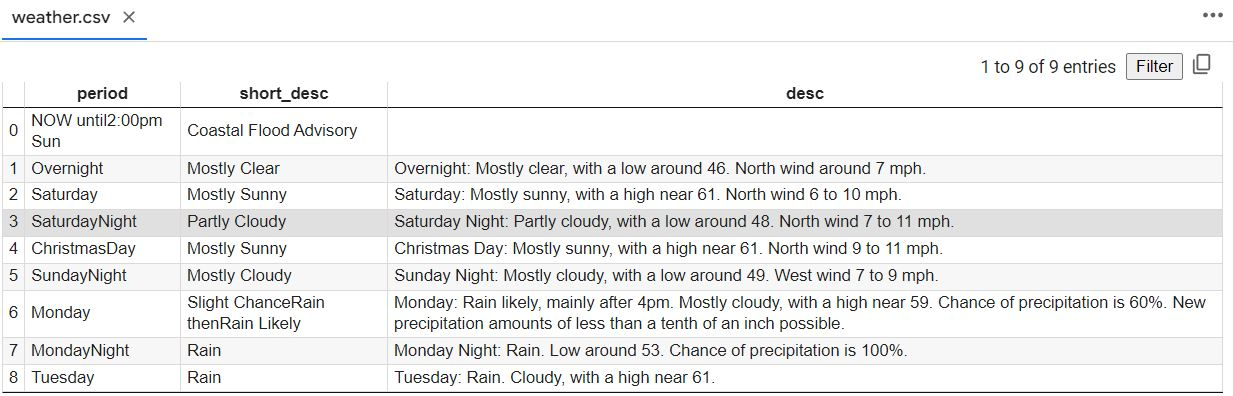

In [17]:
import requests

from bs4 import BeautifulSoup

import pandas as pd

In [18]:
page = requests.get("http://forecast.weather.gov/MapClick.php?lat=37.7772&lon=-122.4168")
soup = BeautifulSoup(page.content, 'html.parser')


In [27]:
seven_day = soup.find(id="seven-day-forecast")
forecast_items = seven_day.find_all(class_="tombstone-container")

In [28]:
tonight = forecast_items[0]
print(tonight)

<div class="tombstone-container">
<p class="period-name">NOW until<br/>2:00pm Sun</p>
<p><img alt="" class="forecast-icon" src="newimages/medium/nfew.png" title=""/></p><p class="short-desc">Coastal Flood Advisory</p></div>


In [30]:
print(tonight.prettify())

<div class="tombstone-container">
 <p class="period-name">
  NOW until
  <br/>
  2:00pm Sun
 </p>
 <p>
  <img alt="" class="forecast-icon" src="newimages/medium/nfew.png" title=""/>
 </p>
 <p class="short-desc">
  Coastal Flood Advisory
 </p>
</div>


In [31]:
period = tonight.find(class_="period-name").get_text()
print(period)

NOW until2:00pm Sun


In [32]:
short_desc = tonight.find(class_="short-desc").get_text()
print(short_desc)

Coastal Flood Advisory


In [33]:
img = tonight.find("img")
desc = img['title']
print(desc)

In [34]:
period_tags = seven_day.select(".tombstone-container .period-name")
periods = [pt.get_text() for pt in period_tags]
periods

['NOW until2:00pm Sun',
 'Overnight',
 'Saturday',
 'SaturdayNight',
 'ChristmasDay',
 'SundayNight',
 'Monday',
 'MondayNight',
 'Tuesday']

In [35]:
short_descs = [sd.get_text() for sd in seven_day.select(".tombstone-container .short-desc")]

descs = [d["title"] for d in seven_day.select(".tombstone-container img")]

print(short_descs)

['Coastal Flood Advisory', 'Mostly Clear', 'Mostly Sunny', 'Partly Cloudy', 'Mostly Sunny', 'Mostly Cloudy', 'Slight ChanceRain thenRain Likely', 'Rain', 'Rain']


In [36]:
print(descs)

['', 'Overnight: Mostly clear, with a low around 46. North wind around 7 mph. ', 'Saturday: Mostly sunny, with a high near 61. North wind 6 to 10 mph. ', 'Saturday Night: Partly cloudy, with a low around 48. North wind 7 to 11 mph. ', 'Christmas Day: Mostly sunny, with a high near 61. North wind 9 to 11 mph. ', 'Sunday Night: Mostly cloudy, with a low around 49. West wind 7 to 9 mph. ', 'Monday: Rain likely, mainly after 4pm.  Mostly cloudy, with a high near 59. Chance of precipitation is 60%. New precipitation amounts of less than a tenth of an inch possible. ', 'Monday Night: Rain.  Low around 53. Chance of precipitation is 100%.', 'Tuesday: Rain.  Cloudy, with a high near 61.']


In [37]:
weather = pd.DataFrame({
        "period": periods, 
        "short_desc": short_descs, 
        "desc":descs
    })

In [38]:
weather

,period,short_desc,desc
0,NOW until2:00pm Sun,Coastal Flood Advisory,
1,Overnight,Mostly Clear,"Overnight: Mostly clear, with a low around 46...."
2,Saturday,Mostly Sunny,"Saturday: Mostly sunny, with a high near 61. N..."
3,SaturdayNight,Partly Cloudy,"Saturday Night: Partly cloudy, with a low arou..."
4,ChristmasDay,Mostly Sunny,"Christmas Day: Mostly sunny, with a high near ..."
5,SundayNight,Mostly Cloudy,"Sunday Night: Mostly cloudy, with a low around..."
6,Monday,Slight ChanceRain thenRain Likely,"Monday: Rain likely, mainly after 4pm. Mostly..."
7,MondayNight,Rain,Monday Night: Rain. Low around 53. Chance of ...
8,Tuesday,Rain,"Tuesday: Rain. Cloudy, with a high near 61."


In [39]:
weather.to_csv('weather.csv')